In [1]:
# Import the modules
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# 1. ETL Workflow

## Extract:

In [2]:
# Read in the CSV file as a Pandas DataFrame
file_path = Path('dataset/spotify_youtube.csv')
spotify_youtube_df = pd.read_csv(file_path)

# # Display sample data
spotify_youtube_df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


## Transform:

In [3]:
# Drop unnecessary first row
spotify_youtube_df = spotify_youtube_df.drop(spotify_youtube_df.columns[0], axis=1)

# Check dataframe
spotify_youtube_df.head() 

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [4]:
# Convert column headers to lowercase for consistency and readability
spotify_youtube_df.columns = spotify_youtube_df.columns.str.lower()

# Check dataframe
spotify_youtube_df.head()

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,...,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [5]:
# Engineer new features
# Create engagement to measure total song activity
spotify_youtube_df['engagement'] = spotify_youtube_df['views'] + spotify_youtube_df['stream']

# Create content ratio to measure YouTube popularity for each song
spotify_youtube_df['youtube popularity'] = spotify_youtube_df['likes'] / spotify_youtube_df['views']

# Check dataframe
spotify_youtube_df.head()

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,...,channel,views,likes,comments,description,licensed,official_video,stream,engagement,youtube popularity
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09,1.733790e+09,0.008970
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08,3.820954e+08,0.014985
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07,7.149852e+07,0.033449
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08,6.464185e+08,0.008446
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08,1.235741e+09,0.010020


In [6]:
# Transform album_type, licensed, and official_video columns to numerical values for machine learning compatability
# Replace values in 'album_type' with numerical representations
spotify_youtube_df['album_type'] = spotify_youtube_df['album_type'].replace({'album': 0, 'single': 1, 'other': 2})

# Convert 'licensed' and 'official_video' from boolean to integers
# 1 = True (licensed/official video), 0 = False (not licensed/not official video)
spotify_youtube_df['licensed'] = spotify_youtube_df['licensed'].fillna(0).astype(int)
spotify_youtube_df['official_video'] = spotify_youtube_df['official_video'].fillna(0).astype(int)
spotify_youtube_df

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,...,channel,views,likes,comments,description,licensed,official_video,stream,engagement,youtube popularity
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,0,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,1,1,1.040235e+09,1.733790e+09,0.008970
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,0,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,1,1,3.100837e+08,3.820954e+08,0.014985
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),1,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,1,1,6.306347e+07,7.149852e+07,0.033449
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,0,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,1,1,4.346636e+08,6.464185e+08,0.008446
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,0,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,1,1,6.172597e+08,1.235741e+09,0.010020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,1,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,-6.344,...,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,1,1,9.227144e+06,9.298822e+06,0.015528
20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,1,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,-1.786,...,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,1,1,1.089818e+07,1.106292e+07,0.012256
20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,1,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,-4.679,...,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,1,1,6.226110e+06,6.261756e+06,0.009230
20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,1,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,-4.004,...,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,1,1,6.873961e+06,6.880494e+06,0.013470


In [7]:
# Summary Statistics
spotify_youtube_df.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,views,likes,comments,licensed,official_video,stream,engagement,youtube popularity
count,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,20718.000000,20718.000000,2.014200e+04,1.969200e+04,20176.000000
mean,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,0.682498,0.758905,1.359422e+08,2.319717e+08,0.012249
std,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,0.465516,0.427758,2.441321e+08,4.679789e+08,0.011308
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,6.574000e+03,7.020000e+03,0.000000
25%,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,0.000000,1.000000,1.767486e+07,2.649538e+07,0.005679
50%,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,1.000000,1.000000,4.968298e+07,7.922365e+07,0.008783
75%,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.000000,1.000000,1.383581e+08,2.264282e+08,0.015006
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,1.000000,1.000000,3.386520e+09,9.586248e+09,0.249204


Because of the large disparity in values between features, we have decided that we should scale the values in the millions down.

## EDA: Visualizations

### Heat Map

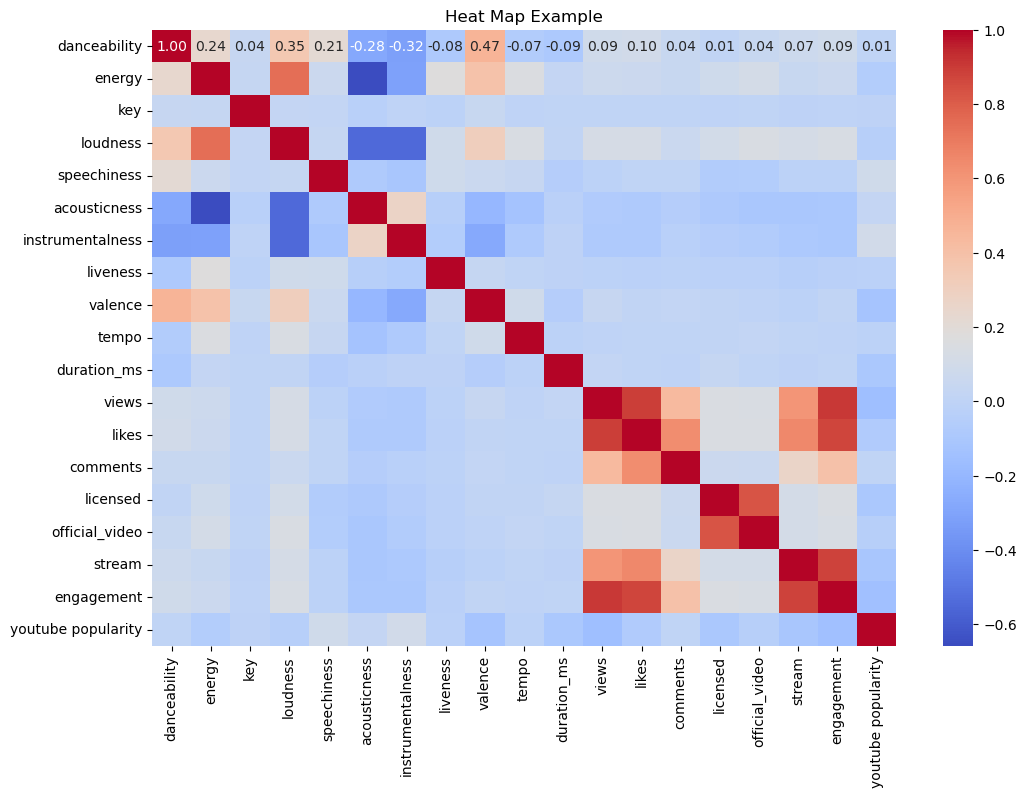

In [17]:
# Isolate compatible columns
heatmap_set = spotify_youtube_df[['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'views', 'likes', 'comments', 'licensed', 'official_video', 'stream', 'engagement', 'youtube popularity']]

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_set.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heat Map Example')
plt.show()

# Models

## Model 1: Logistic Regression

SyntaxError: invalid syntax (1229793659.py, line 1)

## Model 2: Random Forest